In [ ]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Load the dataset
df = pd.read_csv('student_habits_performance.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [ ]:
# Check for null values in the DataFrame
print("Null values before processing:")
display(df.isnull().sum())

# Select a subset of 6 columns including the target variable
selected_columns = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exam_score']
df_subset = df[selected_columns].copy()

# Drop rows with any null values in the selected subset
df_subset.dropna(inplace=True)

# Verify that there are no null values left
print("\nNull values after processing (in selected subset):")
display(df_subset.isnull().sum())

print("\nFirst 5 rows of the selected subset:")
display(df_subset.head())

Null values before processing:


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0



Null values after processing (in selected subset):


,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
attendance_percentage,0
sleep_hours,0
exam_score,0



First 5 rows of the selected subset:


,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exam_score
0,0.0,1.2,1.1,85.0,8.0,56.2
1,6.9,2.8,2.3,97.3,4.6,100.0
2,1.4,3.1,1.3,94.8,8.0,34.3
3,1.0,3.9,1.0,71.0,9.2,26.8
4,5.0,4.4,0.5,90.9,4.9,66.4


In [ ]:
# --- 1. Menghitung Pearson Correlation Coefficient ---
correlation_matrix = df_subset.corr(numeric_only=True)
pearson_correlation = correlation_matrix['exam_score'].drop('exam_score')
print("\nPearson Correlation with Exam Score:")
display(pearson_correlation)


Pearson Correlation with Exam Score:


,exam_score
study_hours_per_day,0.825419
social_media_hours,-0.166733
netflix_hours,-0.171779
attendance_percentage,0.089836
sleep_hours,0.121683


In [ ]:
# --- 2. Menghitung Information Gain ---

bins = pd.qcut(df_subset['exam_score'], q=3, labels=['Low', 'Medium', 'High'])
df_subset['exam_score_binned'] = bins

X = df_subset.drop(['exam_score', 'exam_score_binned'], axis=1)
y = df_subset['exam_score_binned']

information_gain = mutual_info_classif(X, y, random_state=42)
information_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': information_gain})
information_gain_df = information_gain_df.sort_values(by='Information Gain', ascending=False)
print("\nInformation Gain with Binned Exam Score:")
display(information_gain_df)


Information Gain with Binned Exam Score:


,Feature,Information Gain
0,study_hours_per_day,0.403082
4,sleep_hours,0.021173
1,social_media_hours,0.006771
2,netflix_hours,0.000000
3,attendance_percentage,0.000000


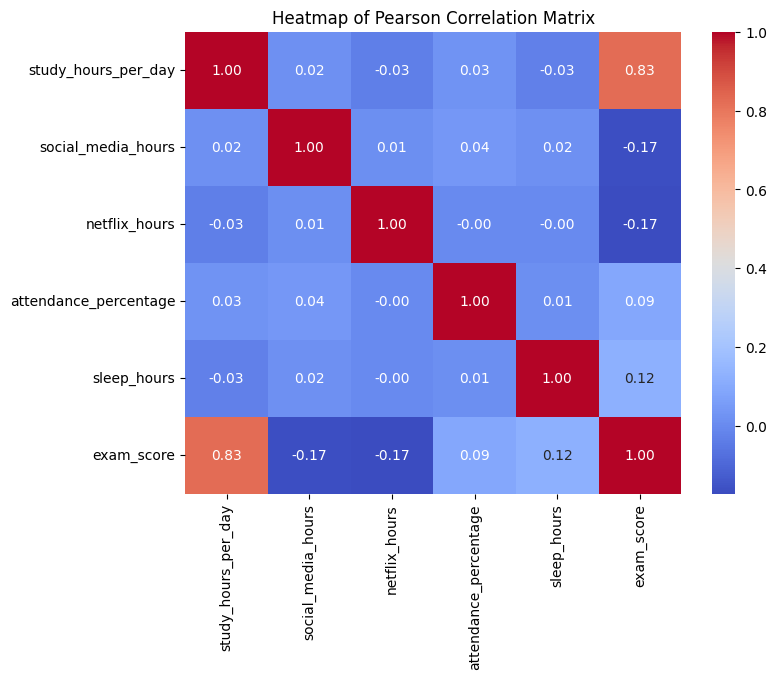

In [ ]:
# --- 3. Membuat Visualisasi Sederhana (Heatmap for Correlation) ---

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pearson Correlation Matrix')
plt.show()